In [1]:
# imports

import json
from collections import Counter
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import utils

%matplotlib inline

In [2]:
# Load and display data

with open('data/countries.json', 'r') as fout:
    countries = json.load(fout)

In [3]:
countries['India'][:20]

['India',
 'Hindi',
 'Bhārat',
 'officially',
 'the',
 'Republic',
 'of',
 'India',
 'Hindi',
 'Bhārat',
 'Gaṇarājya',
 'is',
 'a',
 'country',
 'in',
 'South',
 'Asia',
 'It',
 'is',
 'the']

In [4]:
print(' '.join(countries['India'])[:512] + ' ...')

India Hindi Bhārat officially the Republic of India Hindi Bhārat Gaṇarājya is a country in South Asia It is the second most populous country the seventh largest country by land area and the most populous democracy in the world Bounded by the Indian Ocean on the south the Arabian Sea on the southwest and the Bay of Bengal on the southeast it shares land borders with Pakistan to the west China Nepal and Bhutan to the north and Bangladesh and Myanmar to the east In the Indian Ocean India is in the vicinity of  ...


## Basic Word2Vec Usage

In [5]:
# Create and train a simple model

model = Word2Vec(sentences=countries.values())

In [6]:
# Check word similarities learnt by the model

model.wv.most_similar('India', topn=5)

[('Brazil', 0.8112682700157166),
 ('China', 0.7688724994659424),
 ('Iran', 0.7554206252098083),
 ('Nigeria', 0.7389042377471924),
 ('Mexico', 0.7282829284667969)]

In [7]:
# Enable computation of loss

model = Word2Vec(
    sentences=countries.values(),
    compute_loss=True
)
model.get_latest_training_loss()

5852631.5

### Word2Vec options

In [8]:
Word2Vec?

Init signature:
Word2Vec(
    sentences=None,
    corpus_file=None,
    vector_size=100,
    alpha=0.025,
    window=5,
    min_count=5,
    max_vocab_size=None,
    sample=0.001,
    seed=1,
    workers=3,
    min_alpha=0.0001,
    sg=0,
    hs=0,
    negative=5,
    ns_exponent=0.75,
    cbow_mean=1,
    hashfxn=<built-in function hash>,
    epochs=5,
    null_word=0,
    trim_rule=None,
    sorted_vocab=1,
    batch_words=10000,
    compute_loss=False,
    callbacks=(),
    comment=None,
    max_final_vocab=None,
)
Docstring:     
Serialize/deserialize objects from disk, by equipping them with the `save()` / `load()` methods.

Warnings
--------
This uses pickle internally (among other techniques), so objects must not contain unpicklable attributes
such as lambda functions etc.
Init docstring:
Train, use and evaluate neural networks described in https://code.google.com/p/word2vec/.

Once you're finished training a model (=no more updates, only querying)
store and use only the :class:

## Heuristics for Word2vec algorithms

### Determining size of the vocabulary

In [9]:
# How many unique words in the vocabulary?

counter = Counter()
for words in countries.values():
    for word in words:
        counter.update([word])

print(len(counter))

93695


In [10]:
# Default vocabulary size of the original model

len(model.wv)

23345

Loss after epoch 0: 1596787.625
Loss after epoch 1: 1220221.625
Loss after epoch 2: 1086456.5
Loss after epoch 3: 931209.75
Loss after epoch 4: 899702.5
Loss after epoch 5: 888054.5
Loss after epoch 6: 830791.5
Loss after epoch 7: 838554.5
Loss after epoch 8: 699962.5
Loss after epoch 9: 694871.0


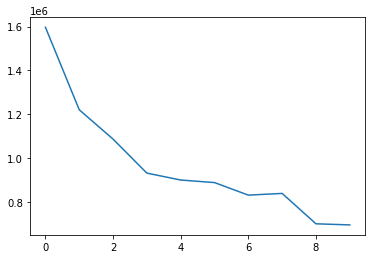

In [11]:
# Retrain - increased vocabulary size, more epochs, larger word vectors

metric = utils.MetricCallback(every=1)
model = Word2Vec(
    sentences=countries.values(),
    vector_size=128,
    epochs=10,
    max_vocab_size=65536,
    compute_loss=True,
    callbacks=[metric]
)
plt.plot(metric.myloss)

In [12]:
# Check similarities again

model.wv.most_similar('India')

[('China', 0.650174617767334),
 ('Pakistan', 0.6341954469680786),
 ('Nepal', 0.6148123145103455),
 ('Nigeria', 0.5793164372444153),
 ('Indonesia', 0.5742387175559998),
 ('Malaysia', 0.5721217393875122),
 ('Vietnam', 0.5682392120361328),
 ('Asia', 0.5580486059188843),
 ('Africa', 0.5530642867088318),
 ('Egypt', 0.540938675403595)]

Loss after epoch 0: 531100.4375
Loss after epoch 10: 298498.0
Loss after epoch 20: 255368.0
Loss after epoch 30: 219727.0
Loss after epoch 40: 210683.0
Loss after epoch 50: 203139.0
Loss after epoch 60: 205330.0
Loss after epoch 70: 157280.0
Loss after epoch 80: 154068.0
Loss after epoch 90: 149076.0


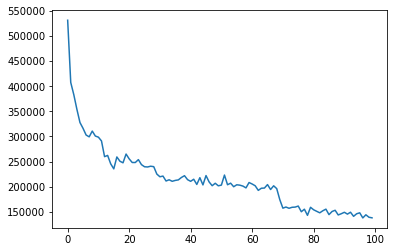

In [13]:
# Retrain - more epochs

metric = utils.MetricCallback(every=10)
model = Word2Vec(
    sentences=countries.values(),
    vector_size=128,
    epochs=100,
    max_vocab_size=65536,
    compute_loss=True,
    callbacks=[metric],
    min_alpha=0.001,
    workers=9
)
plt.plot(metric.myloss)

In [14]:
model.wv.most_similar('India')

[('Pakistan', 0.6124475598335266),
 ('China', 0.6119917631149292),
 ('Nepal', 0.6050204634666443),
 ('Singapore', 0.5263034701347351),
 ('Bengal', 0.5241402387619019),
 ('Bangladesh', 0.5232338309288025),
 ('Bhutan', 0.522027850151062),
 ('Indonesia', 0.5218863487243652),
 ('Vietnam', 0.4868035316467285),
 ('Japan', 0.48357152938842773)]

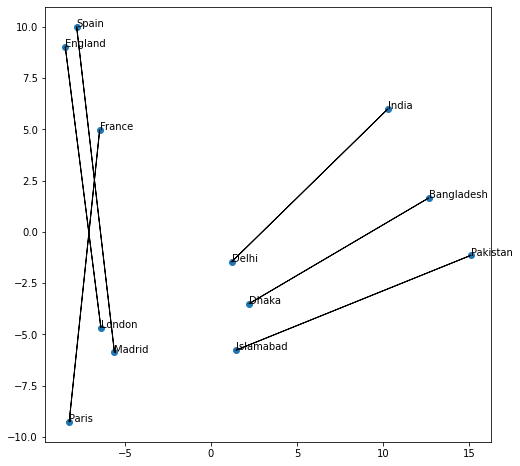

In [15]:
# Examine the vector space

X = ['India', 'Pakistan', 'Bangladesh', 'France', 'England', 'Spain']
Y = ['Delhi', 'Islamabad', 'Dhaka', 'Paris', 'London', 'Madrid']
utils.plot_arrows(X, Y, model.wv)

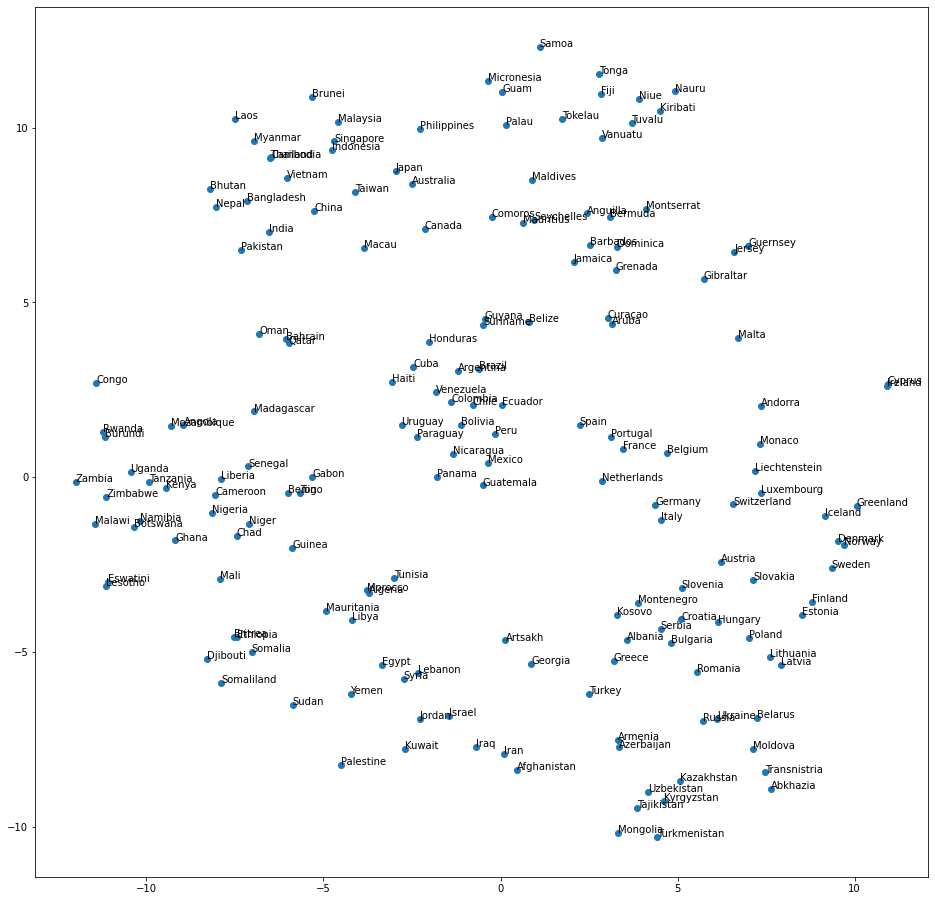

In [16]:
# Visualize vectors for all countries

utils.plot_vectors(countries, model)

## Word Analogies

In [17]:
# India: Ganges -> Brazil: __ ?

model.wv.most_similar(positive=['Ganges', 'Brazil'], negative=['India'])

[('Amazon', 0.5325192809104919),
 ('Paraná', 0.5220039486885071),
 ('river', 0.5009180903434753),
 ('Putumayo', 0.49493175745010376),
 ('Pastaza', 0.4761371910572052),
 ('Drava', 0.47420212626457214),
 ('Napo', 0.4623488783836365),
 ('Andean', 0.45177921652793884),
 ('Petén', 0.4491199254989624),
 ('Brahmaputra', 0.4373367726802826)]

In [18]:
# America: Washington -> France: __ ?

model.wv.most_similar(positive=['Washington', 'France'], negative=['America'])

[('Paris', 0.5019786357879639),
 ('Victor', 0.44693464040756226),
 ('IV', 0.4291045069694519),
 ('Elisabeth', 0.38181576132774353),
 ('Mussolini', 0.3775767385959625),
 ('arbitration', 0.37163451313972473),
 ('Accords', 0.36723172664642334),
 ('Brittany', 0.3666311204433441),
 ('Anjou', 0.3638744056224823),
 ('Treasury', 0.362709641456604)]

In [19]:
# India: Hindi -> Germany: __ ?

model.wv.most_similar(positive=['Hindi', 'Germany'], negative=['India'])

[('German', 0.450189471244812),
 ('Yiddish', 0.4158284366130829),
 ('Georg', 0.3988466262817383),
 ('Austrians', 0.3665944039821625),
 ('Music', 0.3614685833454132),
 ('physicists', 0.3613590896129608),
 ('Guinness', 0.35107287764549255),
 ('likes', 0.3507746756076813),
 ('Sign', 0.34966930747032166),
 ('Liège', 0.3397541046142578)]

In [20]:
# Save the model

model.save('wiki-countries.w2v')